# `Diagnosis of Hepatitis Disease using Machine Learning`

## Required Packages

These are the packages that we are going to use in this file.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, metrics
from sklearn.metrics import ConfusionMatrixDisplay,auc, confusion_matrix, classification_report, roc_curve, accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler,Normalizer, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")


### File path of the Dataset

In [11]:
file_path = "Data/hepatitis_dataset_modified.csv"
data = pd.read_csv(file_path)
data = data.drop(columns = "Unnamed: 0", axis=1)

# Data Information


In [13]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          154 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          154 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver Big        145 non-null    float64
 9   Liver Firm       144 non-null    float64
 10  Spleen Palpable  150 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascities         150 non-null    float64
 13  Varices          150 non-null    float64
 14  Bilirubin        149 non-null    float64
 15  ALK Poshphate    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  Albumin         

#### Display the Dataset

In [15]:
# print the head i.e, top 5 row of the file
print(data.head())

   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0      2   30    2      1.0           2      2.0      2.0       2.0   
1      2   50    1      1.0           2      1.0      2.0       2.0   
2      2   78    1      2.0           2      1.0      2.0       2.0   
3      2   31    1      NaN           1      2.0      2.0       2.0   
4      2   34    1      2.0           2      2.0      2.0       2.0   

   Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascities  Varices  \
0        1.0         2.0              2.0      2.0       2.0      2.0   
1        1.0         2.0              2.0      2.0       2.0      2.0   
2        2.0         2.0              2.0      2.0       2.0      2.0   
3        2.0         2.0              2.0      2.0       2.0      2.0   
4        2.0         2.0              2.0      2.0       2.0      2.0   

   Bilirubin  ALK Poshphate   SGOT  Albumin  Protime  Histology  
0        1.0           85.0   18.0      4.0      NaN          1  
1 

In [16]:
# print the tail i.e, last 5 row of the file
print(data.tail())

     Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
150      1   46    1      2.0           2      1.0      1.0       1.0   
151      2   44    1      2.0           2      1.0      2.0       2.0   
152      2   61    1      1.0           2      1.0      1.0       2.0   
153      2   53    2      1.0           2      1.0      2.0       2.0   
154      1   43    1      2.0           2      1.0      2.0       2.0   

     Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascities  Varices  \
150        2.0         2.0              2.0      1.0       1.0      1.0   
151        2.0         1.0              2.0      2.0       2.0      2.0   
152        1.0         1.0              2.0      1.0       2.0      2.0   
153        2.0         2.0              1.0      1.0       2.0      1.0   
154        2.0         2.0              1.0      1.0       1.0      2.0   

     Bilirubin  ALK Poshphate   SGOT  Albumin  Protime  Histology  
150        7.6            NaN  242.0      

#### Prints all the basic mathematic static of dataset

In [18]:
data.describe()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


#### Here we going to show the size of our dataset

In [20]:
print(data.shape)

(155, 20)


#### Here we are showing the number of missing values in our dataset.

In [22]:
data.isnull().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascities            5
Varices             5
Bilirubin           6
ALK Poshphate      29
SGOT                4
Albumin            16
Protime            67
Histology           0
dtype: int64

#### Here we are showing the unique number of values in given feature.

In [24]:
class_unique=data['Class'].nunique()
print(f'unique values in class are:{class_unique}')

Age_unique=data['Age'].nunique()
print(f'unique values in Age are:{Age_unique}')

Sex_unique=data['Sex'].nunique()
print(f'unique values in Sex are:{Sex_unique}')

Steroid_unique=data['Steroid'].nunique()
print(f'unique values in Steroid are:{Steroid_unique}')

Fatigue_unique=data['Fatigue'].nunique()
print(f'unique values in Fatigue are:{Fatigue_unique}')

Malaise_unique=data['Malaise'].nunique()
print(f'unique values in Malaise are:{Malaise_unique}')

Anorexia_unique=data['Anorexia'].nunique()
print(f'unique values in Anorexia are:{Anorexia_unique}')

Liver_Big_unique=data['Liver Big'].nunique()
print(f'unique values in Liver big are:{Liver_Big_unique}')

unique values in class are:2
unique values in Age are:49
unique values in Sex are:2
unique values in Steroid are:2
unique values in Fatigue are:2
unique values in Malaise are:2
unique values in Anorexia are:2
unique values in Liver big are:2


# Data Preprocessing
We're going to remove the rows with NaN Values and do some Class Balancing using SMOTE

If the null values in the data is marked as `?` , we will use this method before going into the below steps.

`data.replace('?', pd.NA, inplace=True)`

#### Remove the rows with null value.
We're droping the row with null value using dropna.This will help clean the data so that the model can learn better.

In [29]:
modified_data = data
modified_data.dropna(inplace=True)
modified_data

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
10,2,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
12,2,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1
13,2,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2
145,2,31,1,1.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [30]:
# to confirm that no Null values are there.
modified_data.isnull().sum()

Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascities           0
Varices            0
Bilirubin          0
ALK Poshphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
dtype: int64

#### Working on outliers.

In [32]:
def show_outlier(modified_data,feature):
    # Calculate the first quartile (Q1)
    Q1 = modified_data[feature].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = modified_data[feature].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1 * IQR

    # Identify outliers
    outliers = modified_data[modified_data['Age'] > upper_bound]
    details = [Q1,Q3,IQR, upper_bound, outliers]
    
    return details
    

In [33]:
# To verify the result
details = show_outlier(modified_data, "Age")
upper_bound = details[3]
print(details[4])
# Removing the outliers
modified_data= modified_data[modified_data['Age']< upper_bound]

#modified_data = modified_data.drop(133) ## Alternative way to drop the outlier as we know the id of that instance.

     Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
133      2   72    1      2.0           1      1.0      2.0       2.0   

     Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascities  Varices  \
133        2.0         1.0              2.0      2.0       2.0      2.0   

     Bilirubin  ALK Poshphate  SGOT  Albumin  Protime  Histology  
133        1.0          115.0  52.0      3.4     50.0          2  


#### Number of  Male and Female after filtering.

In [35]:
modified_data["Class"].value_counts()

Class
2    66
1    13
Name: count, dtype: int64

From above result we can see that the class is imbalace, so we're going to do some class balancing technique and other preprocessing method

#### Here we're going to use `SMOTE(Synthetic Minority Oversampling Technique)` for Class Balancing.

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [38]:
x = modified_data.drop(['Class'], axis=1)
y = modified_data['Class']
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(x,y)
X_res["Class"]=y_res
data_smote = X_res

In [39]:
data_smote["Class"].value_counts()

Class
2    66
1    66
Name: count, dtype: int64

#### Here we are using Min Max Scalar 
We are using Minmaxscalar on following features:
* ALK Poshphate
* Protime

In [41]:
# Feature scaling
minmax = MinMaxScaler(feature_range=(0,1))
data_smote["ALK Poshphate"]= minmax.fit_transform(data_smote["ALK Poshphate"].values.reshape(-1,1))
data_smote["Protime"]= minmax.fit_transform(data_smote["Protime"].values.reshape(-1,1))
data_smote.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology,Class
0,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,0.271654,28.0,4.0,0.75,1,2
1,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,0.204724,30.0,4.4,0.85,1,2
2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.129921,249.0,3.7,0.54,1,2
3,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,0.216535,60.0,3.9,0.52,1,2
4,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,0.122047,144.0,4.9,0.78,1,2


In [42]:
# Testing 
standard_scalar = StandardScaler()
data_smote["ALK Poshphate"]= standard_scalar.fit_transform(data_smote["ALK Poshphate"].values.reshape(-1,1))
data_smote["Protime"]= standard_scalar.fit_transform(data_smote["Protime"].values.reshape(-1,1))
data_smote.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology,Class
0,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,-0.314279,28.0,4.0,0.942746,1,2
1,39,1,1.0,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,-0.615324,30.0,4.4,1.398985,1,2
2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,-0.951787,249.0,3.7,-0.015357,1,2
3,41,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,-0.562199,60.0,3.9,-0.106605,1,2
4,30,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,-0.987204,144.0,4.9,1.079618,1,2


In [43]:
# Displaying the Data after Preprocessing.
print(data_smote)

     Age  Sex   Steroid  Antivirals  Fatigue   Malaise  Anorexia  Liver Big  \
0     34    1  2.000000           2      2.0  2.000000       2.0        2.0   
1     39    1  1.000000           1      2.0  2.000000       2.0        1.0   
2     32    1  2.000000           1      1.0  2.000000       2.0        2.0   
3     41    1  2.000000           1      1.0  2.000000       2.0        2.0   
4     30    1  2.000000           2      1.0  2.000000       2.0        2.0   
..   ...  ...       ...         ...      ...       ...       ...        ...   
127   42    1  1.522733           2      2.0  2.000000       2.0        2.0   
128   42    1  1.000000           1      1.0  1.000000       2.0        2.0   
129   39    1  1.025419           1      1.0  1.025419       2.0        2.0   
130   57    1  1.000000           2      1.0  1.000000       2.0        2.0   
131   47    1  1.968571           2      1.0  1.000000       2.0        2.0   

     Liver Firm  Spleen Palpable   Spiders  Ascitie

In [44]:
len(data_smote)

132

## Data Visualization

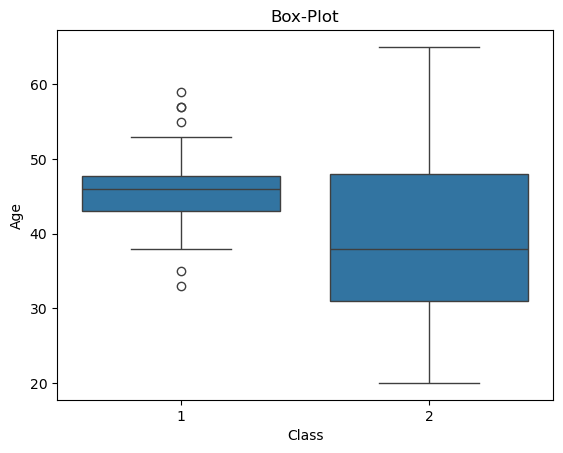

In [46]:
# Boxplot of both Fatigue and Age

sns.boxplot(x="Class", y="Age", data=data_smote);
plt.title("Box-Plot");

The below visualisation is pie chart of Male and female in our dataset.

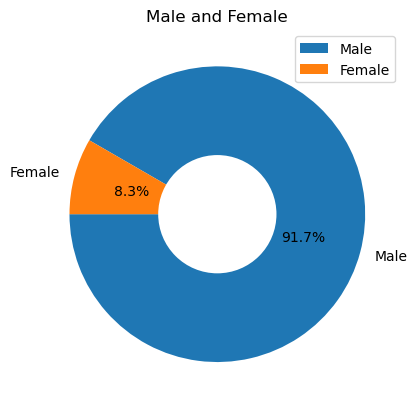

In [48]:
# Pie Chart of Sex Distribution

plt.pie(data_smote["Sex"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%", startangle=180)
center_circle=plt.Circle((0,0),0.40,fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Male and Female")
plt.legend()
plt.show()

The next visulaisation is Scatter plot on diffeerent features.

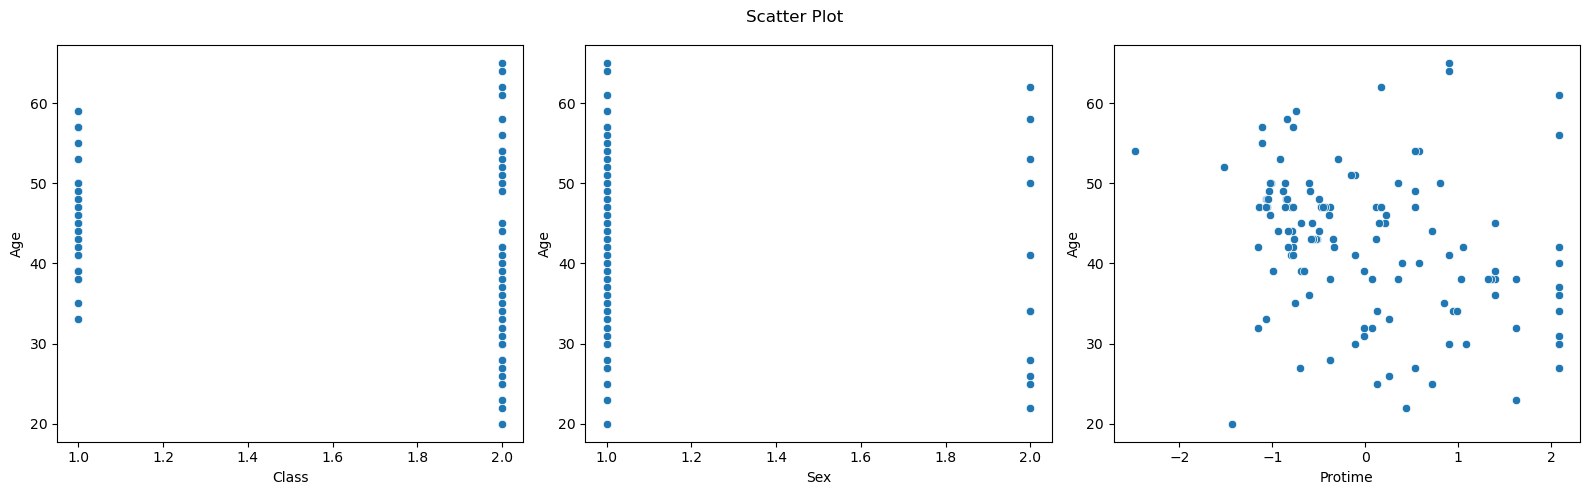

In [50]:
# assign thee required values

_ , axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 5))

scatterplot1 = sns.scatterplot(x='Class', y='Age', data=data_smote, ax=axes[0])
scatterplot2 = sns.scatterplot(x='Sex', y='Age', data=data_smote, ax=axes[1])
scatterplot3 = sns.scatterplot(x='Protime', y='Age', data=data_smote, ax=axes[2])

plt.suptitle("Scatter Plot");

# Adjust layout
plt.tight_layout()

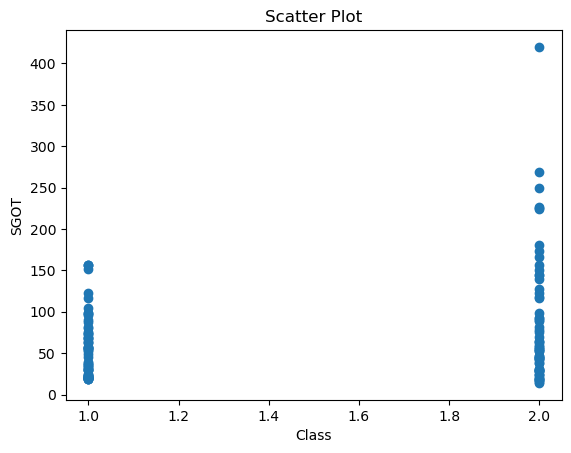

In [51]:
# Using Scatter Plot

plt.scatter(data_smote["Class"],data_smote["SGOT"]);
plt.xlabel("Class")
plt.ylabel("SGOT")
plt.title("Scatter Plot");

Text(0.5, 1.0, ' KDE Plot')

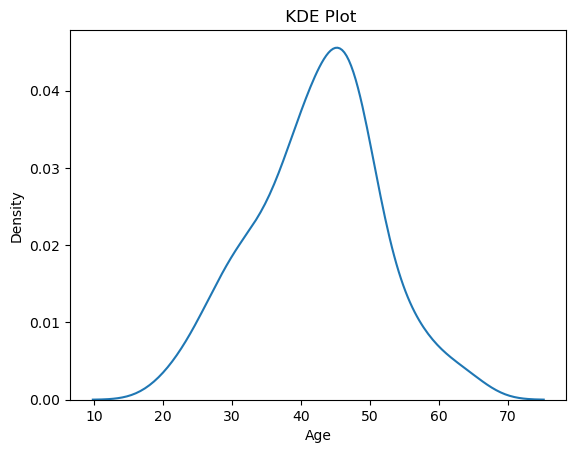

In [52]:
# Kernel Density Estimation Plot on Age
sns.kdeplot(data_smote["Age"]);
plt.title(" KDE Plot")

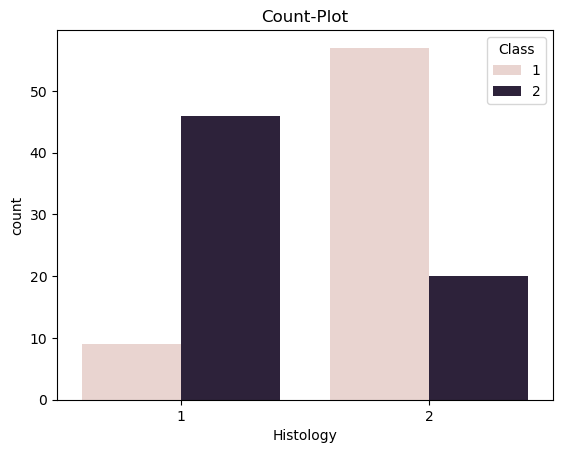

In [53]:
# Count plot on Fatigue
sns.countplot(x="Histology",data=data_smote,hue ="Class" );
plt.title("Count-Plot");

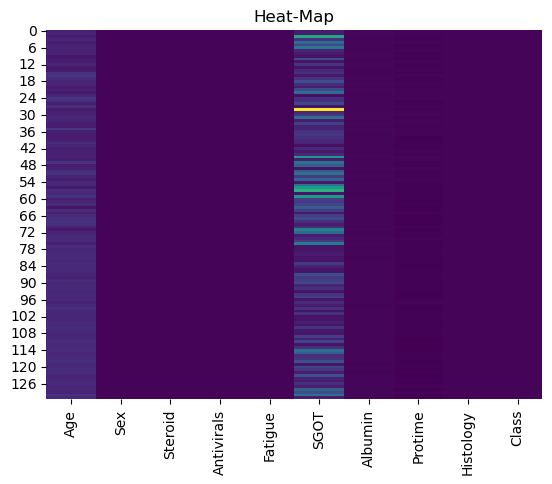

In [54]:
# Here we droped the data and did heatmap on the modified dataset.

mod = data_smote.drop(data_smote.columns[[5,6,7,8,9,10,11,12,13,14]],axis=1)
sns.heatmap(data=mod,cbar=False,cmap="viridis");
plt.title("Heat-Map");

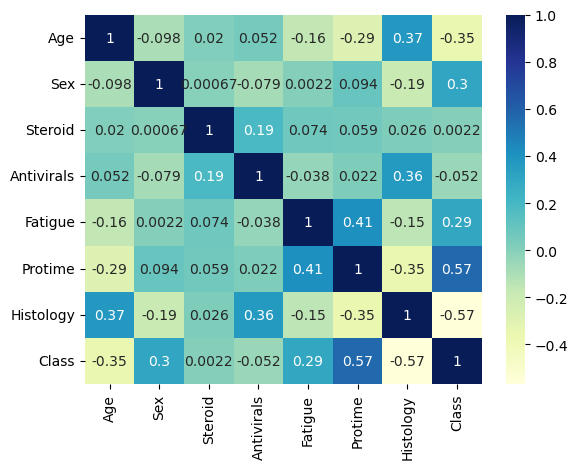

In [55]:
correc_data = data_smote.drop(data_smote.columns[[5,6,7,8,9,10,11,12,13,14,15,16]],axis=1)
sns.heatmap(correc_data.corr(), cmap="YlGnBu", annot=True) ;

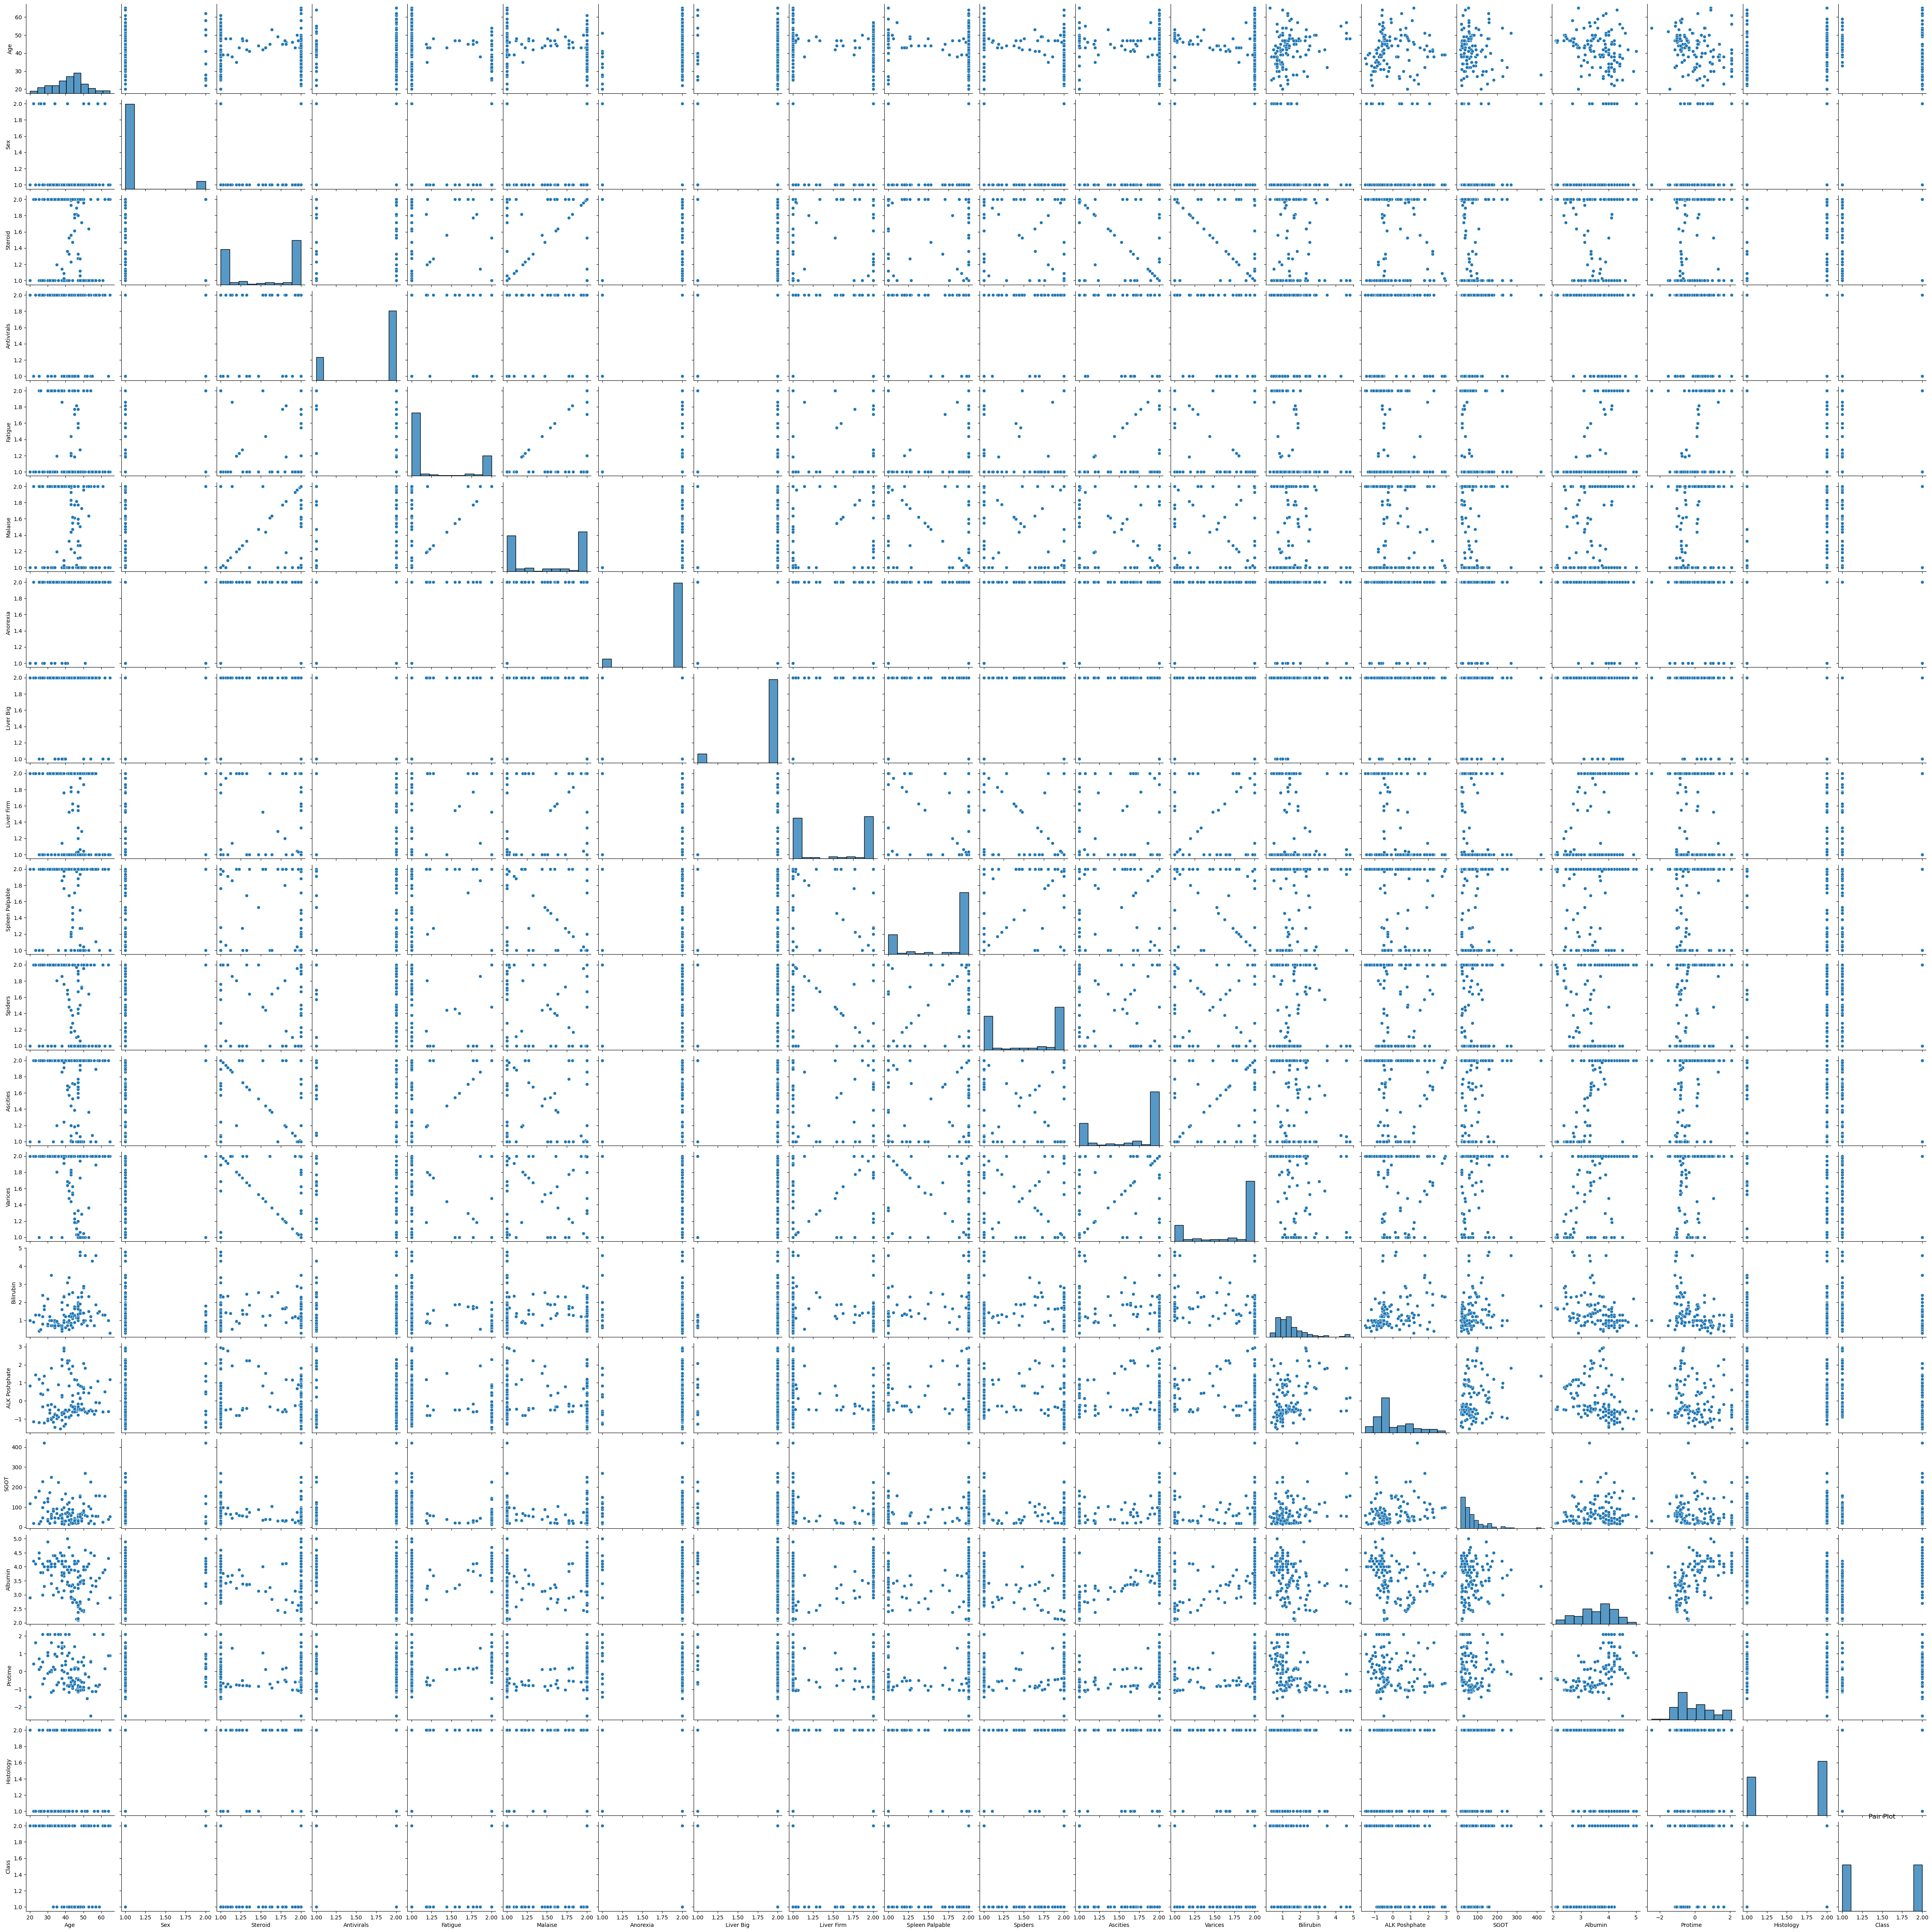

In [56]:
# Orginal Pair Plot with every Feature
sns.pairplot(data_smote);
plt.title("Pair Plot");

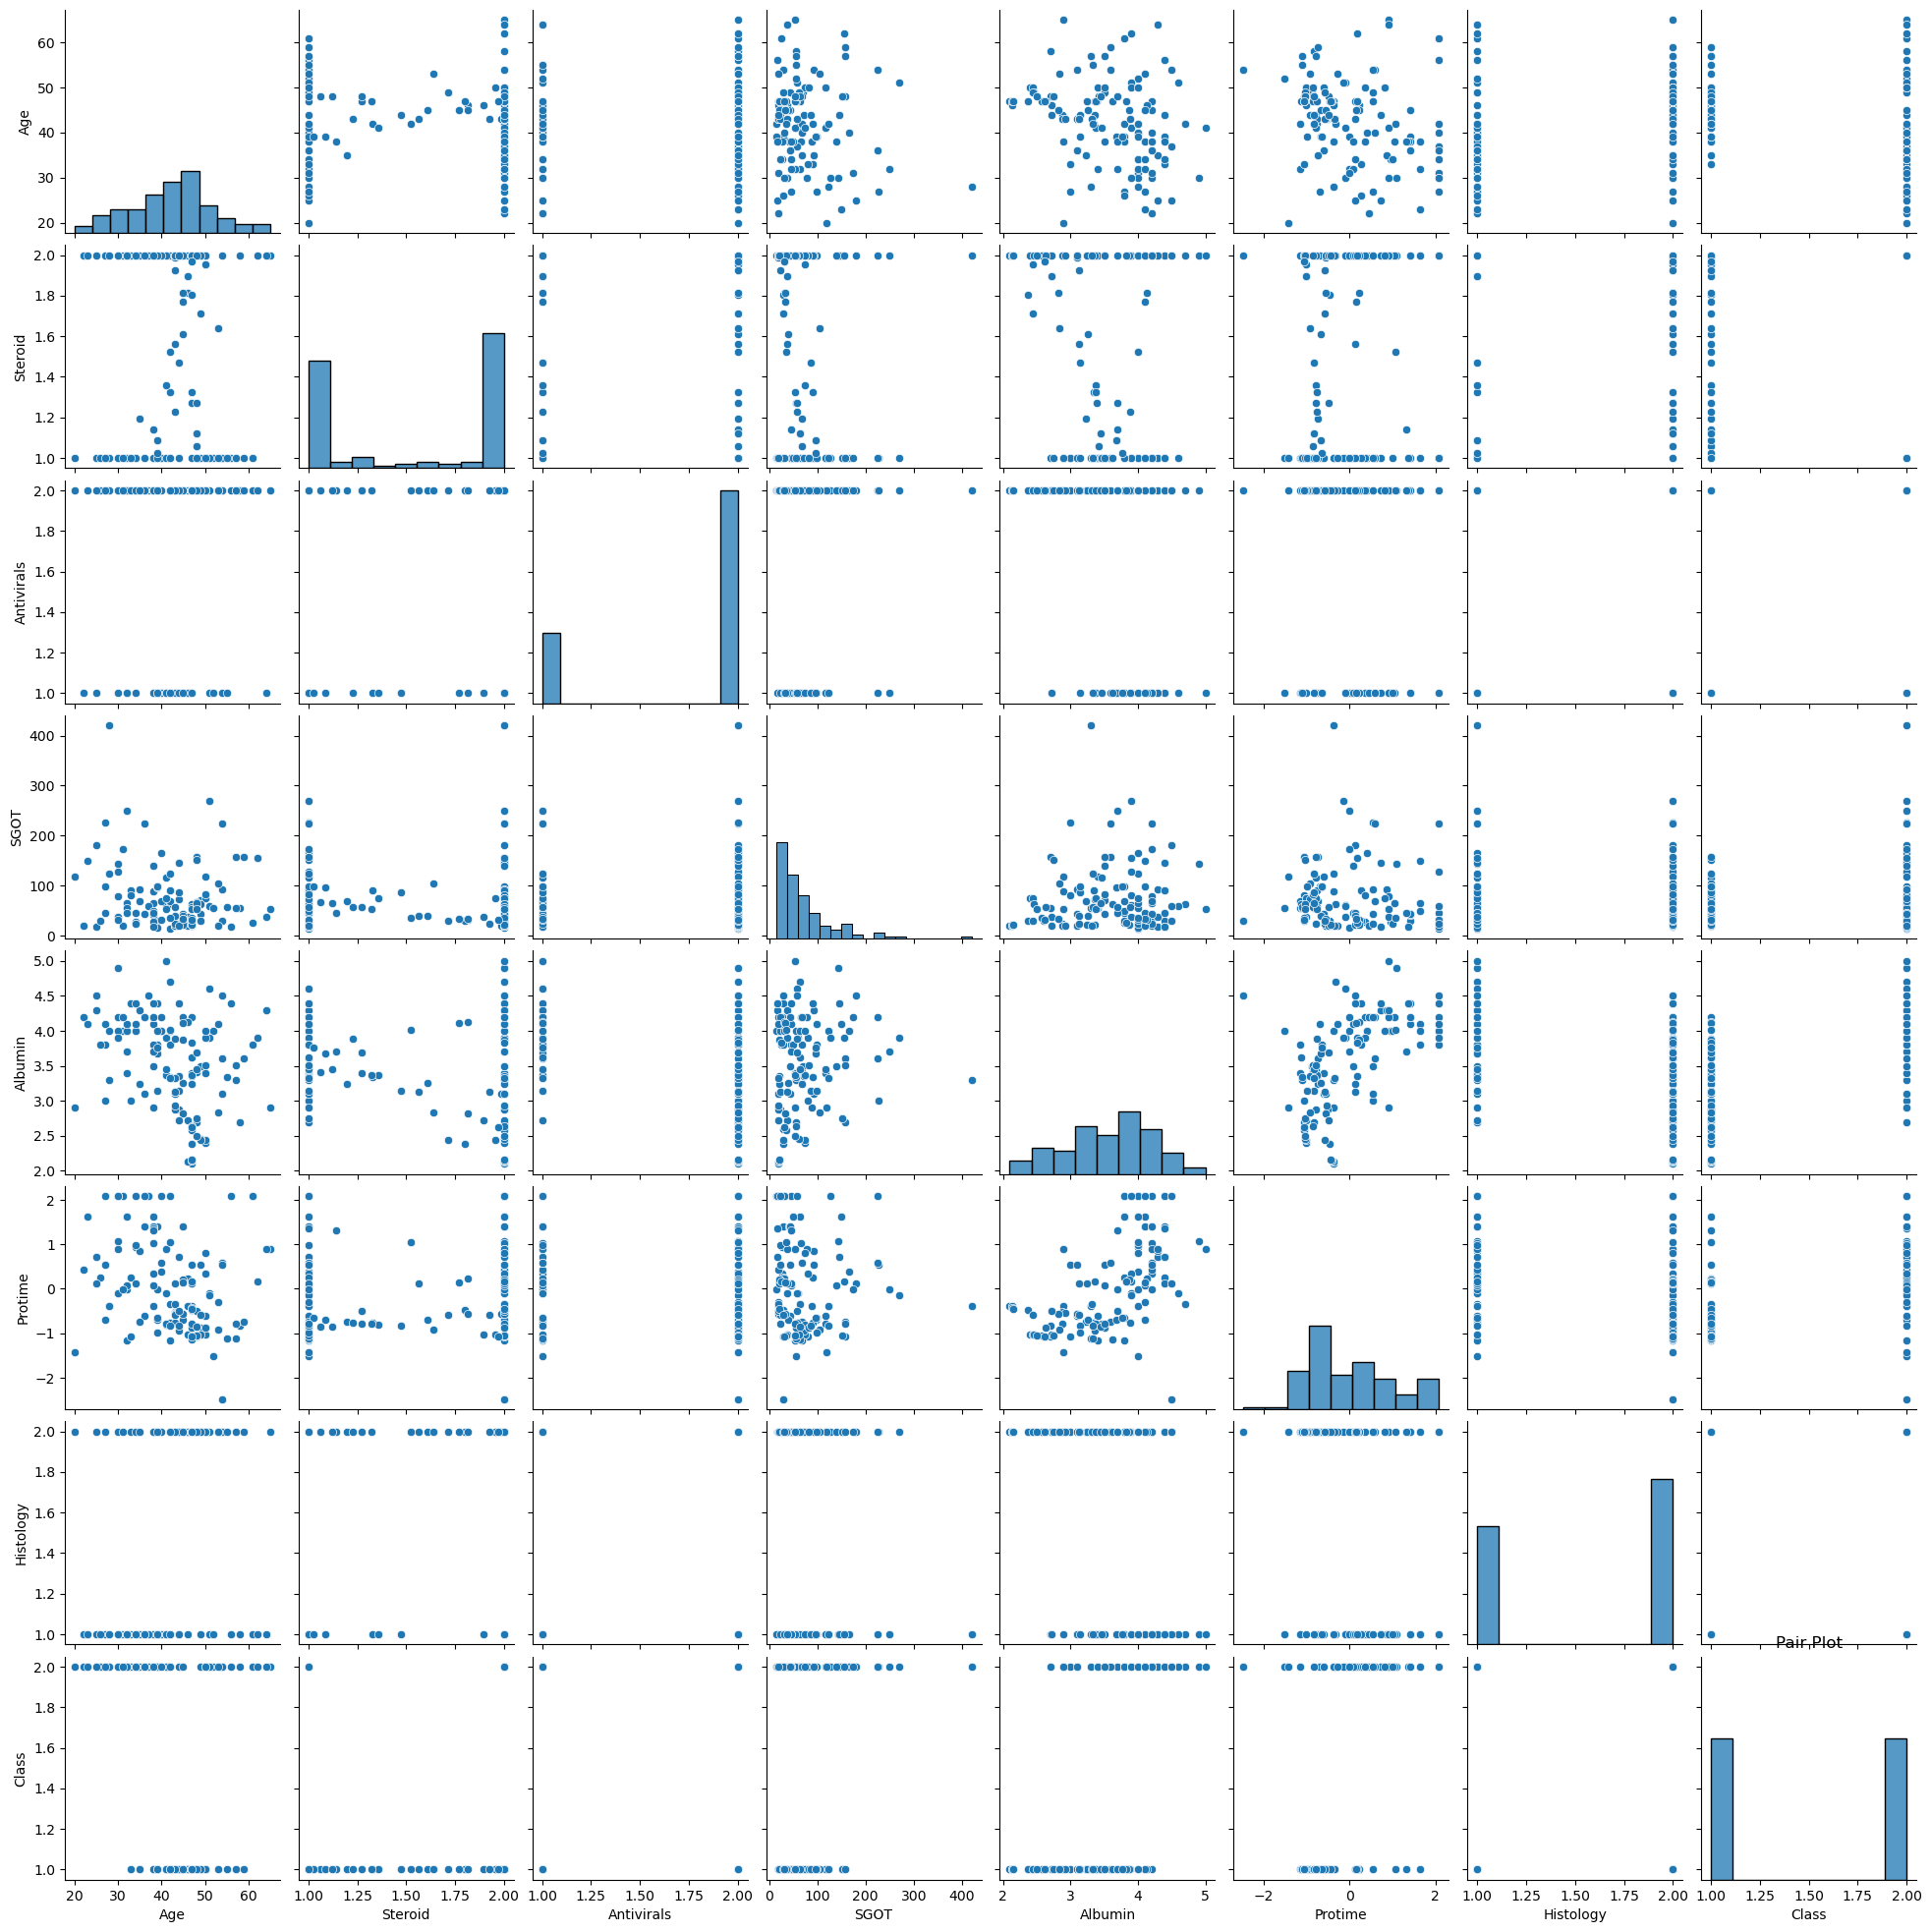

In [57]:
# ReducedPair Plot with every Feature
modified_plot = data_smote.drop(data_smote.columns[[1,4,5,6,7,8,9,10,11,12,13,14]],axis=1)
sns.pairplot(modified_plot);
plt.title("Pair Plot");

## Spliting the data and Fitting the Model

In [59]:
# Here we split the dataset into two data and target
X = data_smote.drop(columns=[ "Class"])
y = data_smote["Class"]
X

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascities,Varices,Bilirubin,ALK Poshphate,SGOT,Albumin,Protime,Histology
0,34,1,2.000000,2,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,0.900000,-0.314279,28.000000,4.000000,0.942746,1
1,39,1,1.000000,1,2.0,2.000000,2.0,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,1.300000,-0.615324,30.000000,4.400000,1.398985,1
2,32,1,2.000000,1,1.0,2.000000,2.0,2.0,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,-0.951787,249.000000,3.700000,-0.015357,1
3,41,1,2.000000,1,1.0,2.000000,2.0,2.0,1.000000,2.000000,2.000000,2.000000,2.000000,0.900000,-0.562199,60.000000,3.900000,-0.106605,1
4,30,1,2.000000,2,1.0,2.000000,2.0,2.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.200000,-0.987204,144.000000,4.900000,1.079618,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,42,1,1.522733,2,2.0,2.000000,2.0,2.0,1.522733,2.000000,1.477267,2.000000,1.477267,1.236373,0.834748,35.408946,4.009093,1.054726,2
128,42,1,1.000000,1,1.0,1.000000,2.0,2.0,1.000000,2.000000,1.572459,1.572459,1.572459,3.368853,1.773135,123.224920,3.329705,-0.829647,1
129,39,1,1.025419,1,1.0,1.025419,2.0,2.0,1.000000,1.974581,2.000000,1.974581,1.974581,2.312710,2.905535,97.415360,3.764413,-0.663370,1
130,57,1,1.000000,2,1.0,1.000000,2.0,2.0,1.000000,1.107891,1.000000,1.892109,1.892109,1.856042,-0.071207,157.000000,3.502898,-0.779797,2


In [60]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluations comparison on y+true labels vs y_preds labels.
    on a Classifications
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precison": round(precision, 2), 
                  "recall": round(recall, 2), 
                  "f1": round(f1, 2)}

    return metric_dict

### `KNN Classifier(K Neighbours)`

In [62]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Using KNeighborClassifier with certain parameter

knn = KNeighborsClassifier(n_neighbors=1,weights="distance",p=1)

# Fitting(Training) the model with training dataset (x_train, y_train)

knn.fit(x_train,y_train)

# Predicting the output of x_test
y_pred1 = knn.predict(x_test.values)

# Evaluating 

accuracy_knn = accuracy_score(y_test, y_pred1)
report_knn = evaluate_preds(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

print(f"The Accuracy of the model is : {accuracy_knn:.3f}")
cross_val_knn = cross_val_score(knn,x_test, y_test, cv =10 )
print(f"The Accuracy after cross Validating is :- {cross_val_knn.mean():.2f}")


              precision    recall  f1-score   support

           1       0.76      1.00      0.86        19
           2       1.00      0.71      0.83        21

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40

The Accuracy of the model is : 0.850
The Accuracy after cross Validating is :- 0.72


### `SVM (Support vector machines)`

In [64]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Using SVC with certain parameter
clf_svm = svm.SVC(kernel='linear', C = 100, gamma = 0.01)

# Fitting(Training) the model with training dataset (x_train, y_train)
clf_svm.fit(x_train, y_train)

# Predicting the output of x_test
y_pred2 = clf_svm.predict(x_test)

# Evaluating

accuracy_svm = accuracy_score(y_test, y_pred2)
report_svm = evaluate_preds(y_test, y_pred2)
cross_val_svm = cross_val_score(clf_svm,x_test, y_test, cv = 10 )

print(classification_report(y_test, y_pred2))
print(f"The Accuracy of the model is : {accuracy_svm:.2f}")
print(f"The Accuracy after cross Validating is :- {cross_val_svm.mean()}")

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

The Accuracy of the model is : 0.95
The Accuracy after cross Validating is :- 0.85


### `Linear Regression`

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)
parameters = {"C":(1,5 ,10, 50, 100),
              "penalty":('l1', 'l2', 'elasticnet', None), 
              "solver":('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag','saga')}
LR = linear_model.LogisticRegression()
lr_grid = GridSearchCV(LR, parameters)
# Fitting(Training) the model with training dataset (x_train, y_train)
lr_grid.fit(x_train, y_train)

cross_val_lr = cross_val_score(lr_grid,x_test, y_test, cv = 10 )
print(f"The Accuracy after cross Validating is :- {cross_val_lr.mean()}")
best_params = lr_grid.best_params_
print(f"The best parameters are: {best_params}")

The Accuracy after cross Validating is :- 0.9
The best parameters are: {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}


In [67]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Using linaer Regression with certain parameter
LR = linear_model.LogisticRegression()

# Fitting(Training) the model with training dataset (x_train, y_train)
LR.fit(x_train, y_train)

# Predicting the output of x_test
y_pred3 = LR.predict(x_test)

# Evaluating

accuracy_lr = accuracy_score(y_test, y_pred3)
report_lr = evaluate_preds(y_test, y_pred3)
print(classification_report(y_test, y_pred3))
print(f"The Accuracy of the model is : {accuracy_lr:.2f}")
cross_val_lr = cross_val_score(LR,x_test, y_test, cv = 10 )
print(f"The Accuracy after cross Validating is :- {cross_val_lr.mean()}")

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.95      0.90      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40

The Accuracy of the model is : 0.93
The Accuracy after cross Validating is :- 0.9


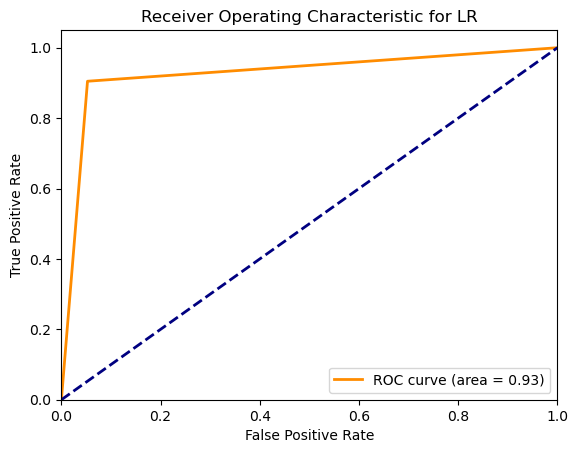

In [68]:
y_probs =  y_pred3
y_probs = y_probs -1
y_test = y_test -1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LR')
plt.legend(loc='lower right')
plt.show()

### `Random Forest Classifier`

In [70]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Using Random Forest Regressor with certain parameter
clf = RandomForestClassifier( n_estimators = 10, random_state = 1, criterion ="gini",  min_samples_split =2)

# Fitting(Training) the model with training dataset (x_train, y_train)
clf.fit(x_train, y_train)

# Predicting the output of x_test
y_pred4 = clf.predict(x_test)

# Evaluating
accuracy_clf = accuracy_score(y_test, y_pred4)
report_clf = evaluate_preds(y_test, y_pred4)
print(classification_report(y_test, y_pred4))
print(f"The Accuracy of the model is : {accuracy_clf:.2f}")
cross_val_clf = cross_val_score(clf,x_test, y_test, cv = 5 )
print(f"The Accuracy after cross Validating is :- {cross_val_clf.mean()}")

              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       1.00      0.86      0.92        21

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.92        40

The Accuracy of the model is : 0.93
The Accuracy after cross Validating is :- 0.85


### `Naive Bayes Classification (Gaussian)`

In [72]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Using Naive Bayes with certain parameter
naiveB = GaussianNB()

# Fitting(Training) the model with training dataset (x_train, y_train)
naiveB.fit(x_train, y_train)

# Predicting the output of x_test
y_pred5 = naiveB.predict(x_test)

# Evaluating
accuracy_naive = accuracy_score(y_test, y_pred5)
report_naive = evaluate_preds(y_test, y_pred5)
print(classification_report(y_test, y_pred5))
print(f"The Accuracy of the model is : {accuracy_naive:.2f}")
cross_val_naive = cross_val_score(naiveB,x_test, y_test, cv = 8 )
print(f"The Accuracy after cross Validating is :- {cross_val_naive.mean()}")

              precision    recall  f1-score   support

           1       0.73      1.00      0.84        19
           2       1.00      0.67      0.80        21

    accuracy                           0.82        40
   macro avg       0.87      0.83      0.82        40
weighted avg       0.87      0.82      0.82        40

The Accuracy of the model is : 0.82
The Accuracy after cross Validating is :- 0.825


### `Decision Tree Classification`

In [74]:
# Splitting Of Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Using Decision Tree with certain parameter
clf_tree = DecisionTreeClassifier(max_depth=11)

# Fitting(Training) the model with training dataset (x_train, y_train)
clf_tree.fit(x_train, y_train)

# Predicting the output of x_test
y_pred6 = clf_tree.predict(x_test)

# Evaluating
accuracy_tree = accuracy_score(y_test, y_pred6)
report_tree = evaluate_preds(y_test, y_pred6)
print(classification_report(y_test, y_pred6))
print(f"The Accuracy of the model is : {accuracy_tree:.2f}")
cross_val_naive = cross_val_score(clf_tree,x_test, y_test, cv = 8 )
print(f"The Accuracy after cross Validating is :- {cross_val_naive.mean()}")

              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       0.83      0.95      0.89        21

    accuracy                           0.88        40
   macro avg       0.89      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40

The Accuracy of the model is : 0.88
The Accuracy after cross Validating is :- 0.7750000000000001


## Evaluating the Model

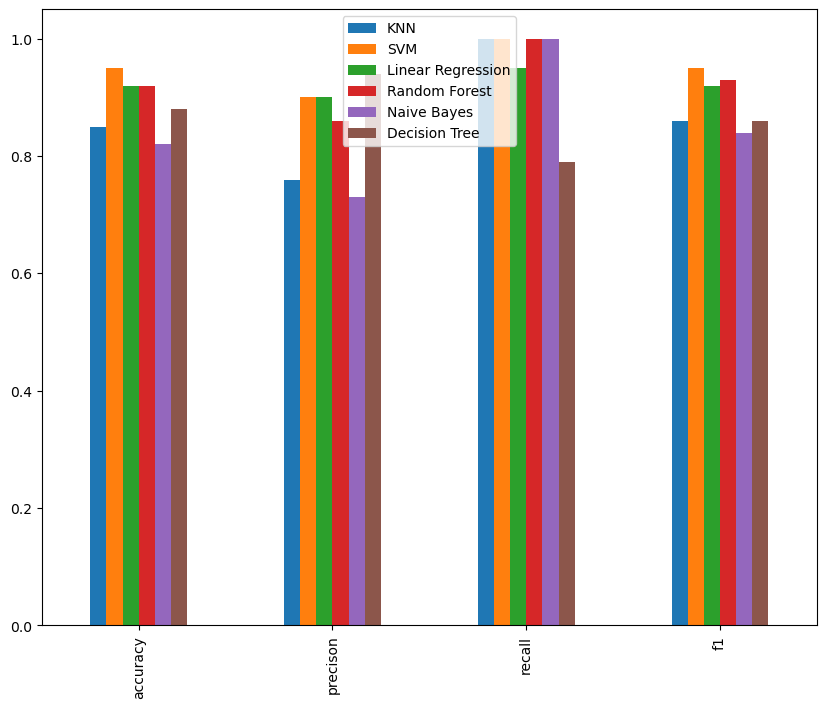

In [76]:
compare_metrics = pd.DataFrame({"KNN": report_knn,
                               "SVM": report_svm,
                               "Linear Regression":report_lr,
                               "Random Forest":report_clf,
                               "Naive Bayes":report_naive,
                               "Decision Tree":report_tree})
compare_metrics.plot.bar(figsize =(10,8));

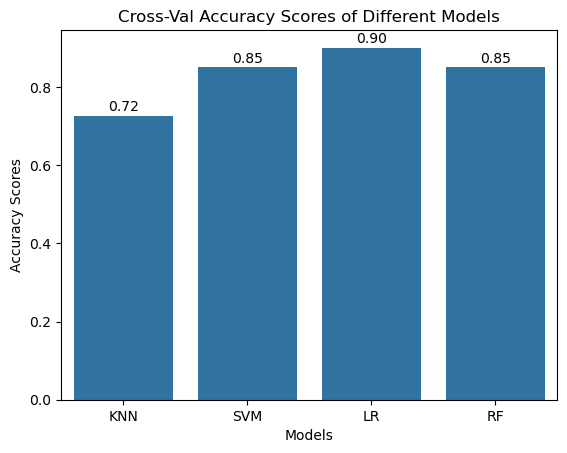

In [77]:


model_names = ['KNN', 'SVM', 'LR', 'RF']
accuracy_scores = [cross_val_knn.mean(), cross_val_svm.mean(), cross_val_lr.mean(), cross_val_clf.mean()]


#plt.bar(model_names, accuracy_scores)
sns.barplot(x=model_names, y=accuracy_scores)
# Adding titles and labels
plt.title('Cross-Val Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')

# Adding the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f'{score:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()


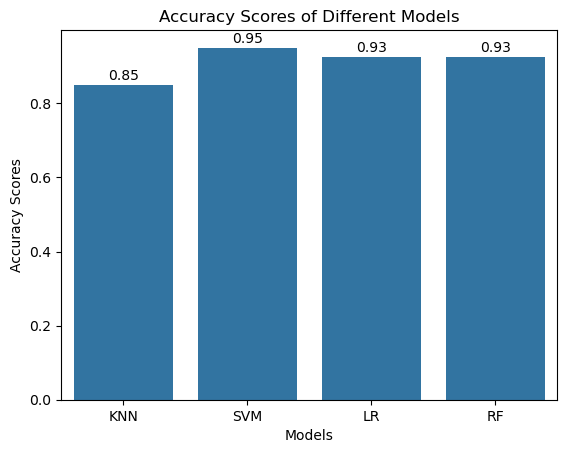

In [78]:
# Step 2: Prepare the data
model_names = ['KNN', 'SVM', 'LR', 'RF']
accuracy_scores = [accuracy_knn, accuracy_svm, accuracy_lr, accuracy_clf]


#plt.bar(model_names, accuracy_scores)
sns.barplot(x=model_names, y=accuracy_scores)
# Adding titles and labels
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')

# Adding the accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f'{score:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

In [79]:
# Classification Report on KNN
report_knn = classification_report(y_test, y_pred1)
print(report_knn)

              precision    recall  f1-score   support

           1       0.76      1.00      0.86        19
           2       1.00      0.71      0.83        21

    accuracy                           0.85        40
   macro avg       0.88      0.86      0.85        40
weighted avg       0.89      0.85      0.85        40



In [80]:
# Classification Report on Naive Bayes
report_naive = classification_report(y_test, y_pred5)
print(report_naive)

              precision    recall  f1-score   support

           1       0.73      1.00      0.84        19
           2       1.00      0.67      0.80        21

    accuracy                           0.82        40
   macro avg       0.87      0.83      0.82        40
weighted avg       0.87      0.82      0.82        40



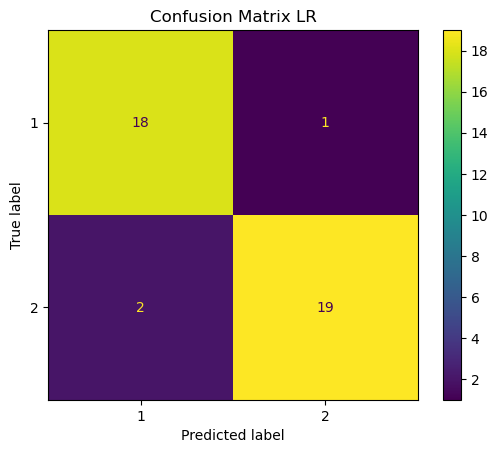

In [81]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                      y_pred = y_pred3);
plt.title("Confusion Matrix LR");

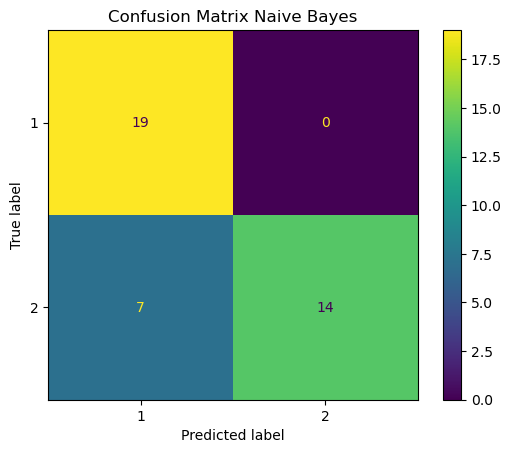

In [82]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                      y_pred = y_pred5);
plt.title("Confusion Matrix Naive Bayes");

In [86]:
dff = {"Classifier":["KNN Classifier", "Naive Bayes Classifer", "Decision Tree", "Random Forest Classifer", "LR" , "SVM"], 
       "Our Accuracy" : [accuracy_knn*100, accuracy_naive*100, accuracy_tree*100, accuracy_clf*100, accuracy_lr*100, accuracy_svm*100 ],
       "Paper Accuracy":[85.93, "Na", "Na", 92.52, 93.18, 90.43]
      }
dF = pd.DataFrame(dff)
dF

,Classifier,Our Accuracy,Paper Accuracy
0,KNN Classifier,85.0,85.93
1,Naive Bayes Classifer,82.5,Na
2,Decision Tree,87.5,Na
3,Random Forest Classifer,92.5,92.52
4,LR,92.5,93.18
5,SVM,95.0,90.43


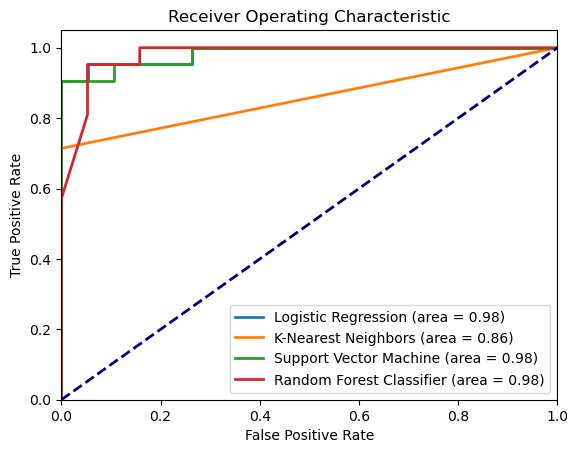

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': linear_model.LogisticRegression(max_iter=10000, solver="lbfgs", verbose=0,C=20000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=1,weights="distance",p=1),
    'Support Vector Machine': svm.SVC(kernel='linear', C = 100, gamma = 0.001,probability=True),
    'Random Forest Classifier':RandomForestClassifier(n_estimators=10, random_state=42, oob_score=True)
}

plt.figure()
y_test = y_test-1

# Iterate over classifiers and plot ROC curves
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1]
    y_probs = y_probs-1
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Display the plot
plt.show()